# Time series analysis and visualisation

Heavily inspired by Jennifer Walker's tutorial: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/ 

### Imports and setup 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set_theme(rc={'figure.figsize':(11, 4)})

### Revisiting the Pandas Series

In [11]:
n = np.array([1,2,3,4])

In [12]:
pd.Series(n)

0    1
1    2
2    3
3    4
dtype: int64

In [14]:
ser_1 = pd.Series([1,2,3], index = ['UK', 'USA', 'EU'])
ser_2 = pd.Series([5,3,7], index = ['UK', 'USA', 'ASIA'])
ser_1 + ser_2

ASIA    NaN
EU      NaN
UK      6.0
USA     5.0
dtype: float64

In [90]:
amzn_data = pd.read_csv("../datasets/AMZN-quote-history.csv")
amzn_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100
1,2021-01-20,3181.989990,3279.800049,3175.000000,3263.379883,3263.379883,5309800
2,2021-01-21,3293.000000,3348.550049,3289.570068,3306.989990,3306.989990,4936100
3,2021-01-22,3304.310059,3321.909912,3283.159912,3292.229980,3292.229980,2821900
4,2021-01-25,3328.500000,3363.889893,3243.149902,3294.000000,3294.000000,3749800
...,...,...,...,...,...,...,...
249,2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500
250,2022-01-13,3305.010010,3324.429932,3221.820068,3224.280029,3224.280029,2609400
251,2022-01-14,3203.000000,3245.000000,3196.010010,3242.760010,3242.760010,2295800
252,2022-01-18,3182.100098,3194.689941,3153.290039,3178.350098,3178.350098,3364600


In [5]:
amzn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [59]:
amzn_data_np = amzn_data.to_numpy()
amzn_data_np

array([['2021-01-19', 3107.0, 3145.0, ..., 3120.76001, 3120.76001,
        3305100],
       ['2021-01-20', 3181.98999, 3279.800049, ..., 3263.379883,
        3263.379883, 5309800],
       ['2021-01-21', 3293.0, 3348.550049, ..., 3306.98999, 3306.98999,
        4936100],
       ...,
       ['2022-01-14', 3203.0, 3245.0, ..., 3242.76001, 3242.76001,
        2295800],
       ['2022-01-18', 3182.100098, 3194.689941, ..., 3178.350098,
        3178.350098, 3364600],
       ['2022-01-19', 3175.23999, 3185.0, ..., 3164.040039, 3164.040039,
        1176420]], dtype=object)

In [6]:
amzn_data_np = amzn_data.to_numpy()

# get the close column
amzn_cp = amzn_data_np[:, 4]
amzn_cp

array([3120.76001, 3263.379883, 3306.98999, 3292.22998, 3294.0,
       3326.129883, 3232.580078, 3237.620117, 3206.199951, 3342.879883,
       3380.0, 3312.530029, 3331.0, 3352.149902, 3322.939941, 3305.0,
       3286.580078, 3262.129883, 3277.709961, 3268.949951, 3308.639893,
       3328.22998, 3249.899902, 3180.73999, 3194.5, 3159.530029,
       3057.159912, 3092.929932, 3146.139893, 3094.530029, 3005.0,
       2977.570068, 3000.459961, 2951.949951, 3062.850098, 3057.639893,
       3113.590088, 3089.48999, 3081.679932, 3091.860107, 3135.72998,
       3027.98999, 3074.959961, 3110.870117, 3137.5, 3087.070068,
       3046.26001, 3052.030029, 3075.72998, 3055.290039, 3094.080078,
       3161.0, 3226.72998, 3223.820068, 3279.389893, 3299.300049,
       3372.199951, 3379.389893, 3400.0, 3333.0, 3379.090088, 3399.439941,
       3372.01001, 3334.689941, 3362.02002, 3309.040039, 3340.879883,
       3409.0, 3417.429932, 3458.5, 3471.310059, 3467.419922, 3386.48999,
       3311.870117, 3270.54

In [61]:
type(amzn_cp)

numpy.ndarray

In [62]:
ser_amzn_cp = pd.Series(amzn_cp)
ser_amzn_cp

0       3120.76001
1      3263.379883
2       3306.98999
3       3292.22998
4           3294.0
          ...     
249    3304.139893
250    3224.280029
251     3242.76001
252    3178.350098
253    3164.040039
Length: 254, dtype: object

In [63]:
type(ser_amzn_cp)

pandas.core.series.Series

In [7]:
# convert the strings containing the dates to pandas datetime object
amzn_dt = pd.to_datetime(amzn_data.Date)
amzn_dt.dt.date

0      2021-01-19
1      2021-01-20
2      2021-01-21
3      2021-01-22
4      2021-01-25
          ...    
249    2022-01-12
250    2022-01-13
251    2022-01-14
252    2022-01-18
253    2022-01-19
Name: Date, Length: 254, dtype: object

In [60]:
type(amzn_dt)

pandas.core.series.Series

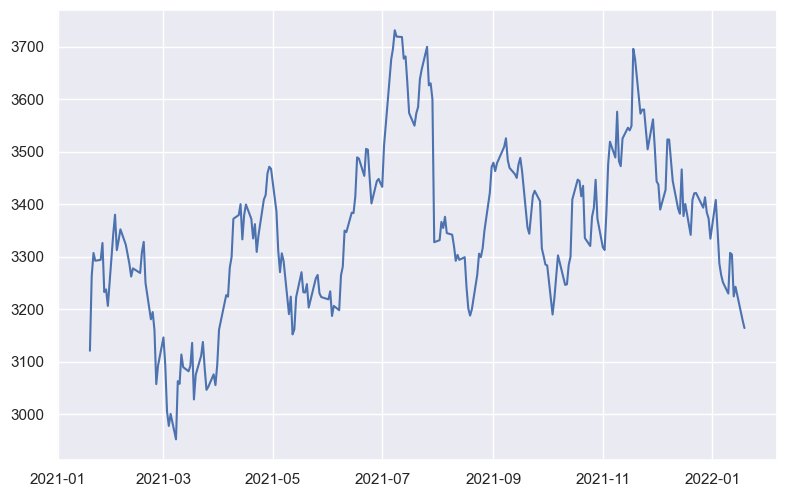

In [64]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ts = plt.plot(amzn_dt.dt.date.to_numpy(), amzn_cp)

#### The Open Power Systems Dataset (OPSD)

In this demo, we will be using the daily time series of Open Power System Data (OPSD) for Germany. Germany has been rapidly expanding its renewable energy production in the 2000s-2010s. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for the years 2006-2017. You can read more about the data here: https://www.kaggle.com/mvianna10/germany-electricity-power-for-20062017.

We will download the CSV dataset from GitHub: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* **Date** — The date (yyyy-mm-dd format)
* **Consumption** — Electricity consumption in GWh
* **Wind** — Wind power production in GWh
* **Solar** — Solar power production in GWh
* **Wind+Solar** — Sum of wind and solar power production in GWh

We will explore how electricity production and consumption in Germany have changed over time, using pandas time series tools to answer questions such as:

* When is electricity consumption typically highest and lowest?
* How do wind and solar power production vary with seasons of the year?
* What are the long-term trends in electricity consumption, solar power, and wind power?
* How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [5]:
opsd_daily = pd.read_csv(
    'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
)
opsd_daily.shape

(4383, 5)

In [68]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [69]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


<Axes: >

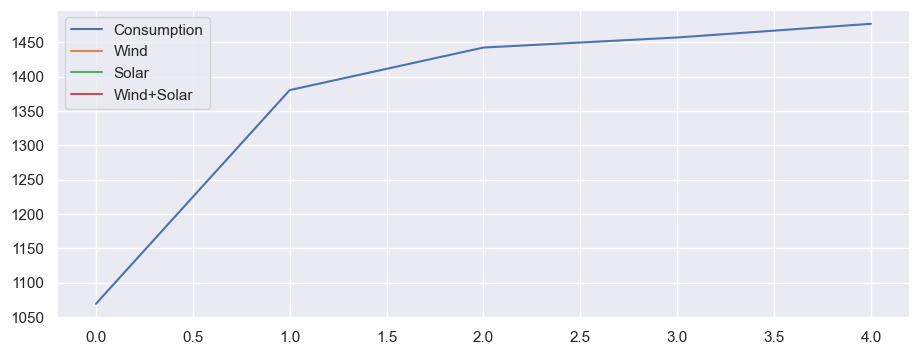

In [5]:
opsd_daily.head().plot()

In [6]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


<Axes: >

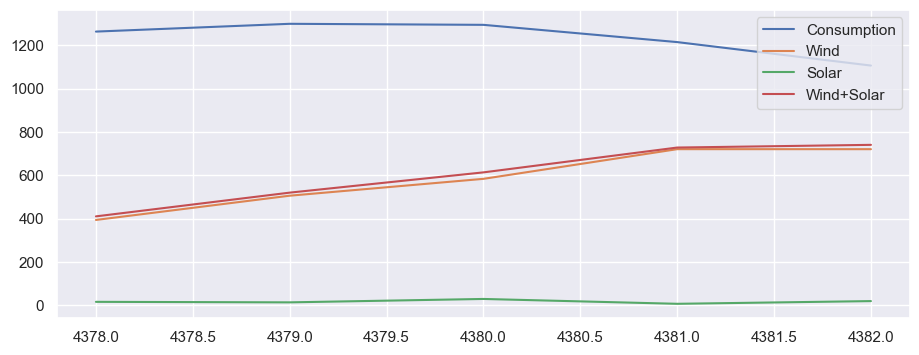

In [7]:
opsd_daily.tail().plot()

### Time series data structures

Before we dive into the OPSD data, let’s briefly introduce the main pandas data structures for working with dates and times. In pandas, a single point in time is represented as a Timestamp. We can use the to_datetime() function to create Timestamps from strings in a wide variety of date/time formats. 

In [8]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [9]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])

In [10]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


Now that the `Date` column is of the `datetime64` type, we can set it as the DataFrame’s index.

In [11]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.sample(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2011-05-22,1055.781,120.751,NaN,NaN
2009-09-19,1093.832,NaN,NaN,NaN
2011-01-07,1404.173,138.973,NaN,NaN
2008-04-27,1065.066,NaN,NaN,NaN
2006-07-30,1010.922,NaN,NaN,NaN


In [12]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [11]:
# As an alternative, we could set the "Date" columns as datetime64
# and set it as an index
opsd_daily = pd.read_csv(
    'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv',
    index_col=0,
    parse_dates=True
)

In [14]:
opsd_daily.sample(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-10-23,1154.99800,72.829,60.492,133.321
2012-08-18,1070.07600,68.438,161.008,229.446
2017-12-03,1330.26226,387.490,12.411,399.901
2014-12-26,1101.68300,42.512,18.696,61.208
2006-06-30,1298.10300,NaN,NaN,NaN


In [15]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [16]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2007-01-25,1580.233,NaN,NaN,NaN,2007,1,Thursday
2009-04-05,971.543,NaN,NaN,NaN,2009,4,Sunday
2014-03-25,1521.834,39.216,107.847,147.063,2014,3,Tuesday
2014-06-11,1452.282,64.544,153.227,217.771,2014,6,Wednesday
2006-10-20,1434.666,NaN,NaN,NaN,2006,10,Friday


### Time-based indexing

This works the same as regular indexing and slicing:

In [17]:
opsd_daily.loc['2017-07-07']

Consumption     1395.258
Wind             123.191
Solar            173.788
Wind+Solar       296.979
Year                2017
Month                  7
Weekday Name      Friday
Name: 2017-07-07 00:00:00, dtype: object

In [18]:
opsd_daily.loc['2012-01-01':'2013-07-01']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,1,Sunday
2012-01-02,1269.581,207.327,6.574,213.901,2012,1,Monday
2012-01-03,1334.745,473.468,24.679,498.147,2012,1,Tuesday
2012-01-04,1347.136,499.804,14.681,514.485,2012,1,Wednesday
2012-01-05,1376.658,523.851,5.071,528.922,2012,1,Thursday
...,...,...,...,...,...,...,...
2013-06-27,1280.278,69.322,110.938,180.260,2013,6,Thursday
2013-06-28,1264.697,72.379,121.132,193.511,2013,6,Friday
2013-06-29,1037.834,164.649,87.244,251.893,2013,6,Saturday


## Partial string indexing

Another very handy feature of pandas time series is partial-string indexing, where we can select all date/times which partially match a given string.

You could use it to get entire months or years of data

In [19]:
# get the whole of July 2015
opsd_daily.loc['2015-07']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-07-01,1444.957,158.819,217.827,376.646,2015,7,Wednesday
2015-07-02,1470.200,218.790,212.962,431.752,2015,7,Thursday
2015-07-03,1439.366,71.633,189.467,261.100,2015,7,Friday
2015-07-04,1215.227,82.893,196.262,279.155,2015,7,Saturday
2015-07-05,1121.175,97.525,174.593,272.118,2015,7,Sunday
2015-07-06,1422.065,173.299,190.647,363.946,2015,7,Monday
2015-07-07,1454.992,120.469,184.434,304.903,2015,7,Tuesday
2015-07-08,1434.461,418.904,127.198,546.102,2015,7,Wednesday
2015-07-09,1415.710,418.717,137.691,556.408,2015,7,Thursday


### Exercise 1: Plot the first seven days of July

<Axes: xlabel='Date'>

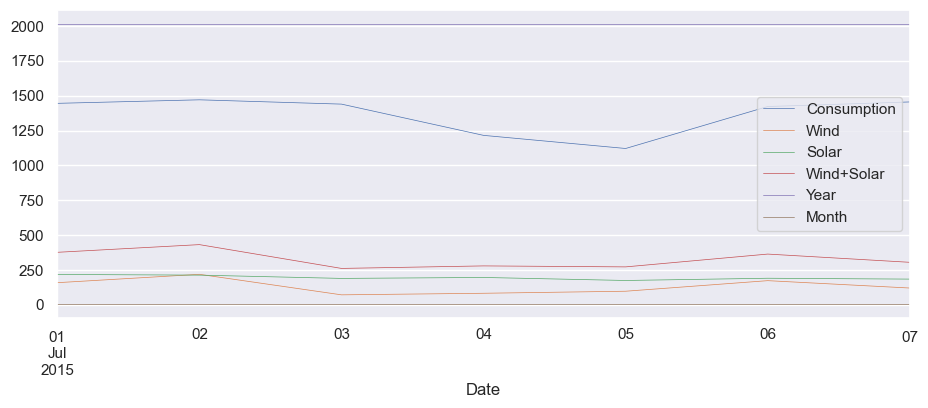

In [20]:
opsd_daily.loc['2015-07-01':'2015-07-07',].plot(linewidth=0.5)

<Axes: xlabel='Date'>

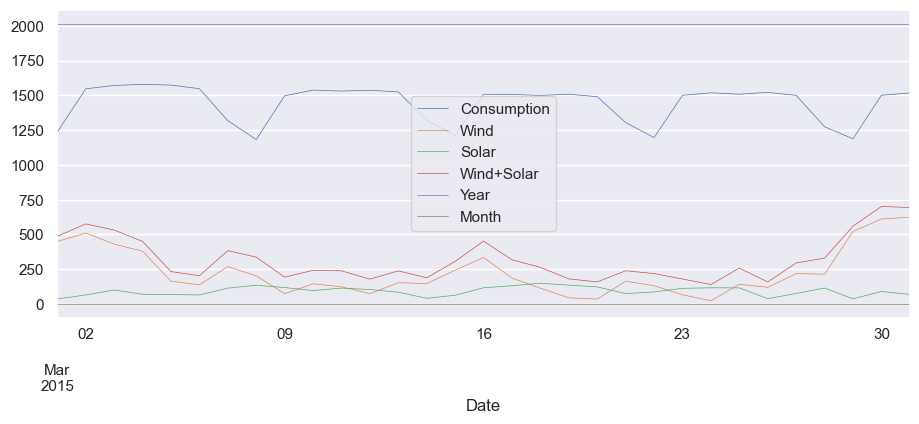

In [21]:
opsd_daily.loc['2015-03'].plot(linewidth=0.5)

### Exercise 2: Plot the wind measurements for March 2017

<Axes: xlabel='Date'>

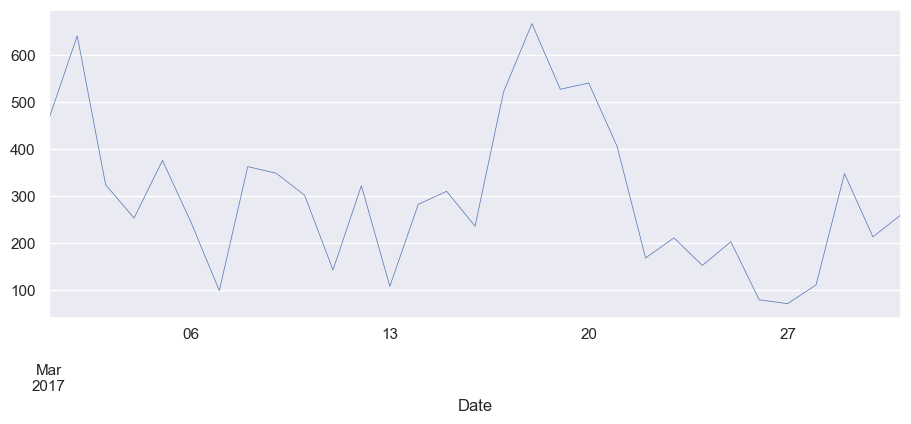

In [22]:
opsd_daily['Wind'].loc['2017-03'].plot(linewidth=0.5)

### Time series data visualisation

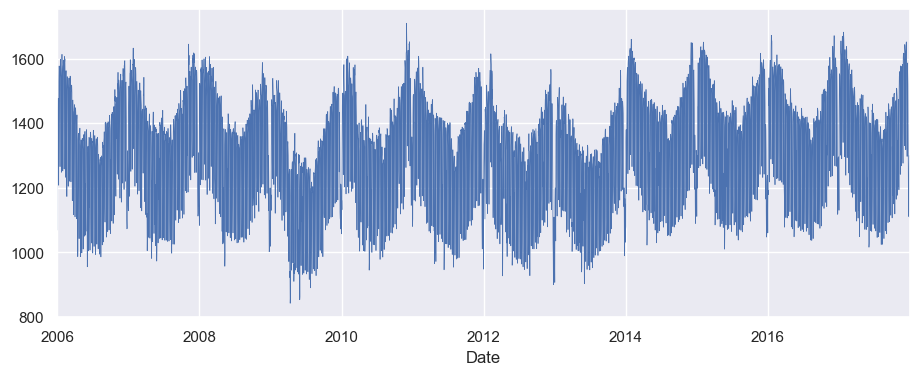

In [23]:
opsd_daily['Consumption'].plot(linewidth=0.5);

The `plot()` method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis

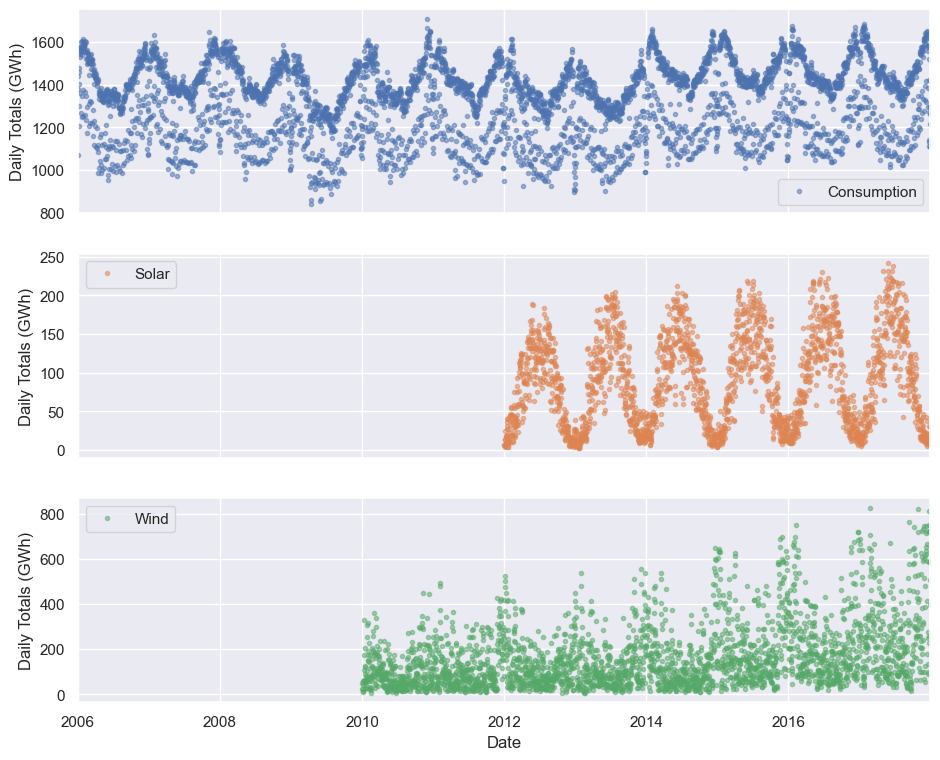

In [24]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(11, 9),
    subplots=True
)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

### Exercise : What kind of patterns do see above? Comment below

In [ ]:
# 1. The differences on total consumption in the week-days and weekends is shown as two tiers of blue dots in the first panel.
# 2. Overall consumption, Solar and Wind sources, increase through time, but at different rates.
# 3. The solar peaks coincide with the summer periods of the year.
# 4. The wind peaks coincide with the winter periods of the year. It is also visible how they compliment the solar sources.


### Seasonality

All three time series clearly exhibit periodicity—often referred to as *seasonality* in time series analysis—in which a pattern repeats again and again at regular time intervals.

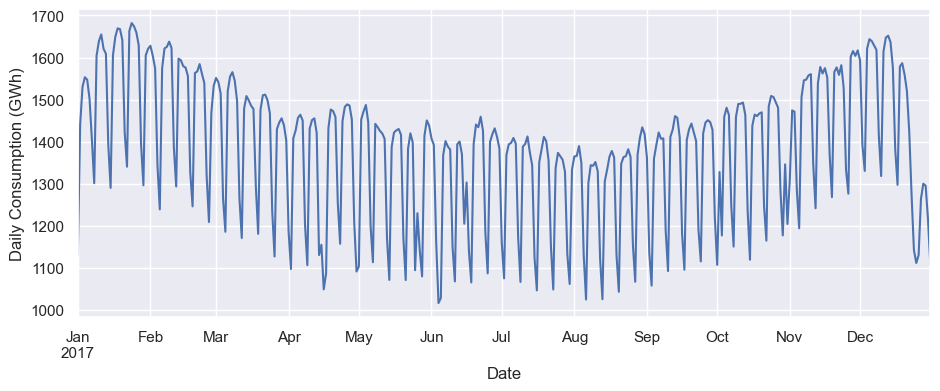

In [33]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

We can see that there are weekly oscillations.

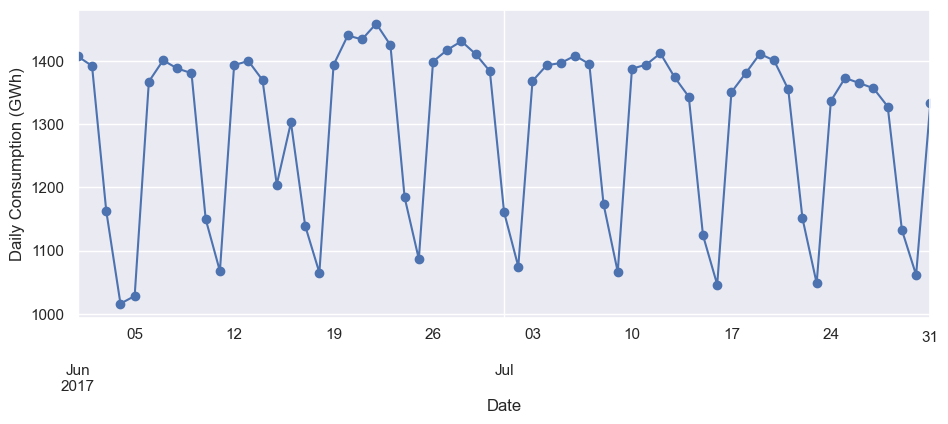

In [34]:
ax = opsd_daily.loc['2017-06':'2017-07', 'Consumption'].plot(
    marker='o',
    linestyle='-'
)
ax.set_ylabel('Daily Consumption (GWh)');

To better visualize the weekly seasonality in electricity consumption in the plot above, it would be nice to have vertical gridlines on a weekly time scale (instead of on the first day of each month). We can customize our plot with matplotlib.dates, so let’s import that module.

In [39]:
import matplotlib.dates as mdates

Because date/time ticks are handled a bit differently in matplotlib.dates compared with the DataFrame’s `plot()` method, let’s create the plot directly in matplotlib. Then we use `mdates.WeekdayLocator()` and `mdates.MONDAY` to set the x-axis ticks to the first Monday of each week. We also use `mdates.DateFormatter()` to improve the formatting of the tick labels, using the format codes we saw earlier.

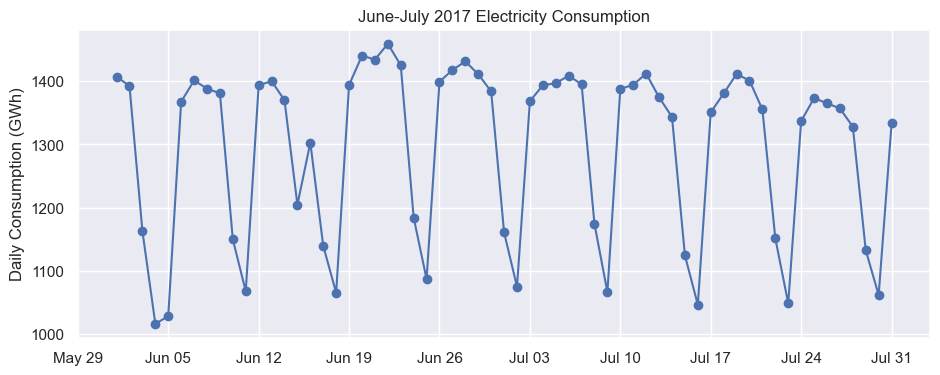

In [37]:
fig, ax = plt.subplots()
ax.plot(
    opsd_daily.loc['2017-06':'2017-07', 'Consumption'],
    marker='o',
    linestyle='-'
)
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('June-July 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Now we have vertical gridlines and nicely formatted tick labels on each Monday, so we can easily tell which days are weekdays and weekends.

### Seasonality

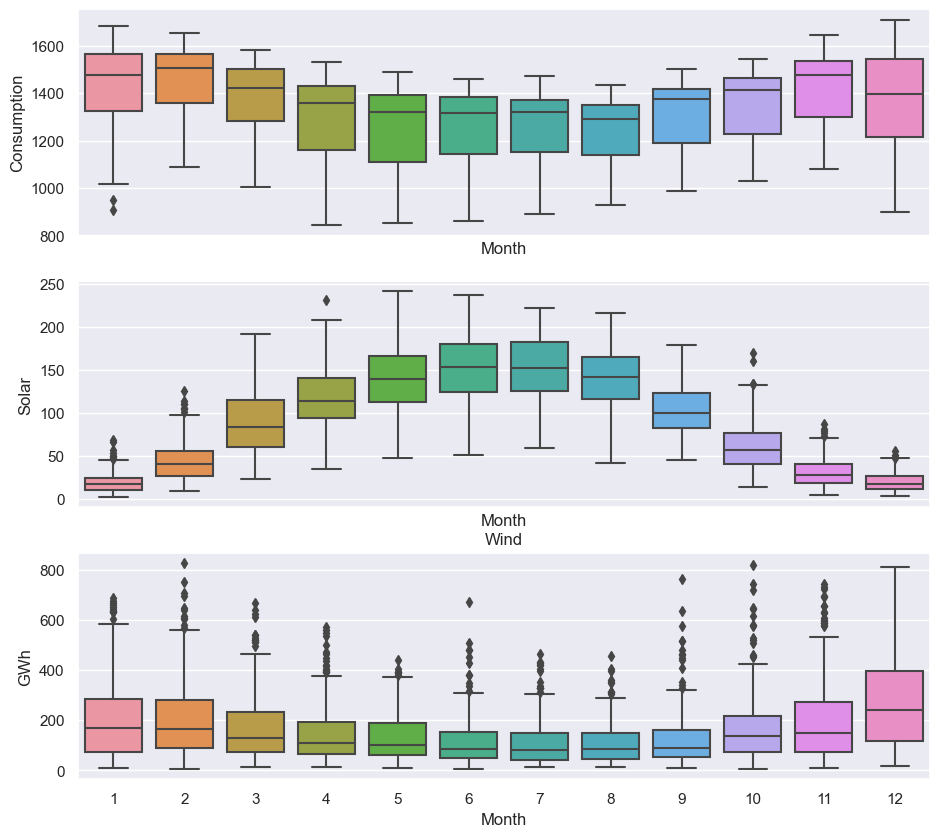

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

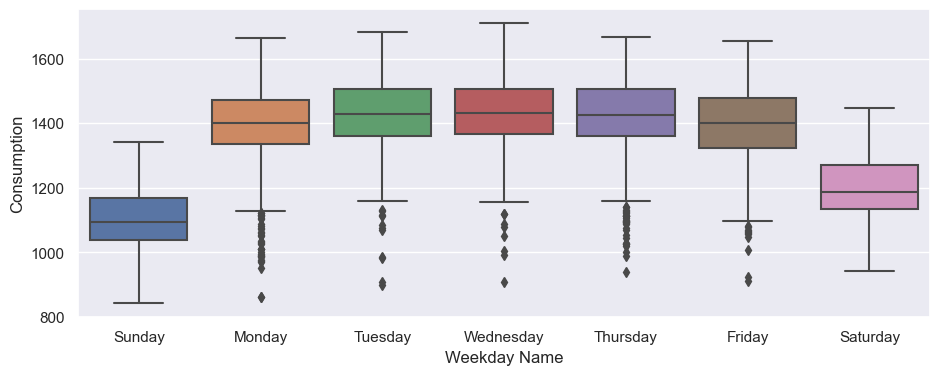

In [39]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

### Frequencies and frequency analysis

When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. For example, let’s use the `date_range()` function to create a sequence of uniformly spaced dates from `2017-03-10` through `2017-03-15` at daily frequency.

In [40]:
# date_range(start, end, freq). For frequency strings see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
# for a list of frequency aliases. "D" = daily
pd.date_range('2017-03-10', '2017-03-15', freq='D')

DatetimeIndex(['2017-03-10', '2017-03-11', '2017-03-12', '2017-03-13',
               '2017-03-14', '2017-03-15'],
              dtype='datetime64[ns]', freq='D')

The resulting `DatetimeIndex` object has an attribute `freq` with a value of 'D', indicating daily frequency. Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.

As another example, let’s create a date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.

In [41]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Let’s take another look at the DatetimeIndex of our `opsd_daily` time series.

In [42]:
opsd_daily.index


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

At the moment it has `freq` set to `None`. We did not explicitly set a freq when we loaded it from the CSV file.

If we know that our data should be at a specific frequency, we can use the DataFrame’s `asfreq()` method to assign a frequency. If any date/times are missing in the data, new rows will be added for those date/times, which are either empty (`NaN`), or filled according to a specified data filling method such as forward filling or interpolation.

To see how this works, let’s create a new DataFrame which contains only the Consumption data for Feb 3, 6, and 8, 2013.



In [43]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


Now we use the `asfreq()` method to convert the DataFrame to daily frequency, with a column for unfilled data, and a column for forward filled data.

In [44]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In the `Consumption` column, we have the original data, with a value of NaN for any date that was missing in our consum_sample DataFrame. 

In the `Consumption - Forward Fill` column, the missings have been forward filled, meaning that the last value repeats through the missing rows until the next non-missing value occurs.

If you’re doing any time series analysis which requires uniformly spaced data without any missings, you’ll want to use `asfreq()` to convert your time series to the specified frequency and fill any missings with an appropriate method.

### Resampling

It can be useful to resample a time series data to a higher or lower frequency. Resampling to a higher frequency (**upsampling**) is not very common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model. Resampling to a lower frequency (**downsampling**) can usually involve some aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was downsampled from the original hourly time series. 

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s `resample()` method, which splits the `DatetimeIndex` into time bins and groups the data by time bin. The `resample()` method returns a `Resampler` object, which is somewhat similar to a pandas `GroupBy` object. We can then apply aggregation methods such as `mean()`, `median()`, `sum()`, etc., to the data group for each time bin.

Let’s try and resample the data to a weekly mean time series.

In [3]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
DATA_COLUMNS = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[DATA_COLUMNS].resample('W').mean()
opsd_weekly_mean.tail(4)

NameError: name 'opsd_daily' is not defined

The first row above, labelled 2017-12-10, contains the mean of all the data contained in the time bin 2017-12-10 through 2017-12-16. The second row, labelled 2017-12-17, contains the mean data for the 2006-01-08 through 2017-12-23 time bin, and so on. By default, each row of the downsampled time series is labelled with the right edge of the time bin.

By construction, our weekly time series has ~1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two DataFrames.

In [46]:
print(opsd_daily.shape)
print(opsd_weekly_mean.shape)
print(opsd_daily.shape[0]/opsd_weekly_mean.shape[0])

(4383, 7)
(627, 4)
6.990430622009569


Let’s plot the daily and weekly Wind time series together over a single six-month period to compare them.

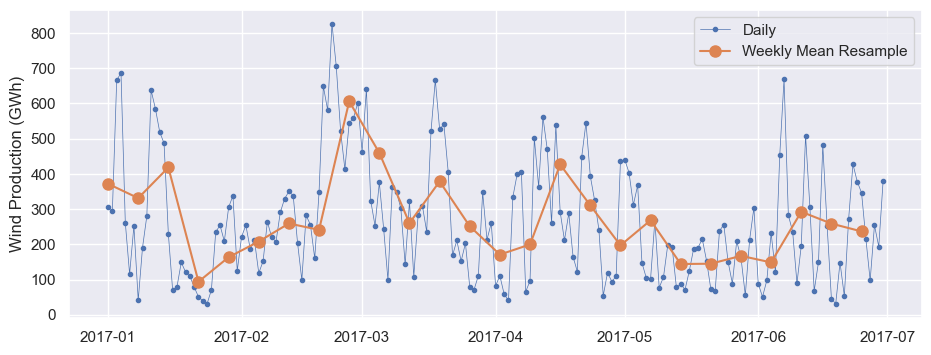

In [47]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Wind'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Wind'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Wind Production (GWh)')
_ = ax.legend()

Now let’s resample the data to monthly frequency, aggregating with sum totals instead of the mean. 

Unlike aggregating with `mean()`, which sets the output to `NaN` for any period with all missing data, the default behavior of `sum()` will return output of 0 as the sum of missing data. We use the `min_count` parameter to change this behavior.

In [48]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily[DATA_COLUMNS].resample('M').sum(min_count=28)
opsd_monthly.tail(4)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654
2017-11-30,44339.72455,10259.001,831.044,11090.045
2017-12-31,44511.10431,14725.436,494.171,15219.607


You might notice that the monthly resampled data is labelled with the end of each month (the right bin edge), whereas the weekly resampled data is labelled with the left bin edge. By default, resampled data is labelled with the right bin edge for monthly, quarterly, and annual frequencies, and with the left bin edge for all other frequencies. This behavior and various other options can be adjusted using the parameters listed in the `resample()` documentation.

Now let’s explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.



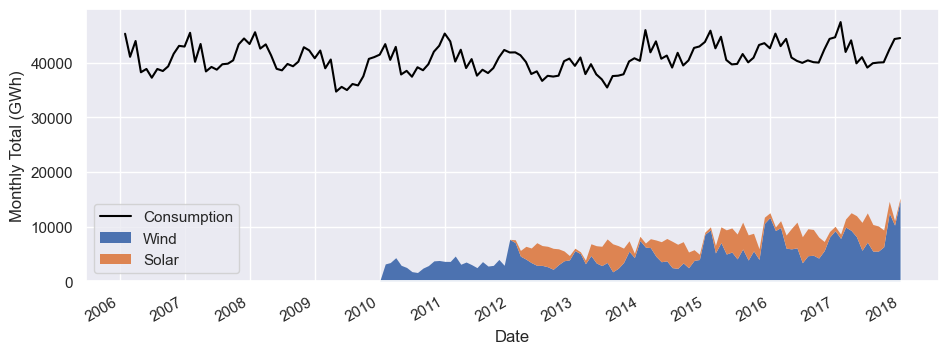

In [49]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
_ = ax.set_ylabel('Monthly Total (GWh)')

At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.

Let’s explore this further by resampling to annual frequency and computing the ratio of `Wind+Solar` to `Consumption` for each year.

In [50]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[DATA_COLUMNS].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar %'] = 100.0 * opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar %
Year,,,,,
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,15.705699
2013,463336.85300,47197.832,29559.780,76697.443,16.553279
2014,504164.82100,51107.672,32498.307,83370.502,16.536358


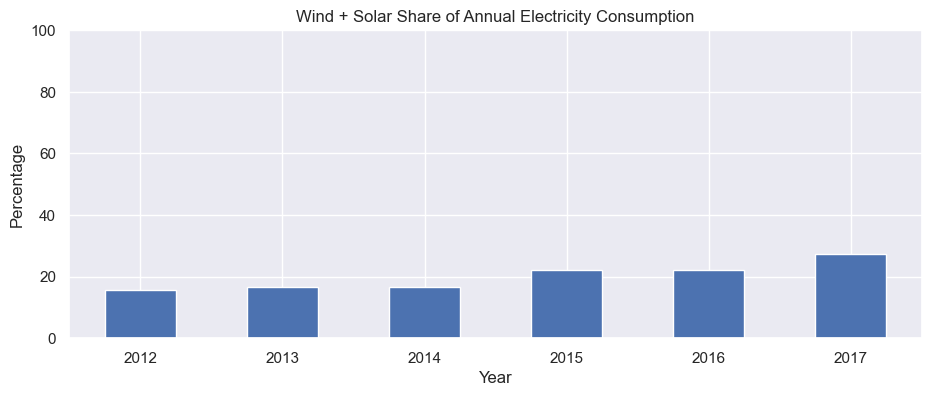

In [51]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar %'].plot.bar(color='C0')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
_ = plt.xticks(rotation=0)

## Rolling windows

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as `mean()`, `median()`, `sum()`, etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

By default, all data points within a window are equally weighted in the aggregation, but this can be changed by specifying window types such as Gaussian, triangular, and others. We’ll stick with the standard equally weighted window here.

Let’s use the `rolling()` method to compute the 5-day rolling mean of our daily data. We use the `center=True` argument to label each window at its midpoint, so the rolling windows are:

* `2006-01-01` to `2006-01-05` — labelled as `2006-01-03`
* `2006-01-02` to `2006-01-06` — labelled as `2006-01-04`
and so on…

In [52]:
opsd_5d = opsd_daily[DATA_COLUMNS].rolling(5, center=True).mean()
opsd_5d.sample(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2015-04-04,1216.2140,163.5792,116.3462,279.9254
2011-12-17,1400.3112,272.5110,NaN,NaN
2016-07-22,1293.7682,69.4594,167.5314,236.9908
2014-02-16,1457.3892,273.7164,60.1590,333.8754
2008-12-03,1516.0220,NaN,NaN,NaN


In [53]:
opsd_5d.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,1365.3172,NaN,NaN,NaN
2006-01-04,1432.1658,NaN,NaN,NaN
2006-01-05,1416.1190,NaN,NaN,NaN


We can see that the first non-missing rolling mean value is on `2006-01-03`, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.



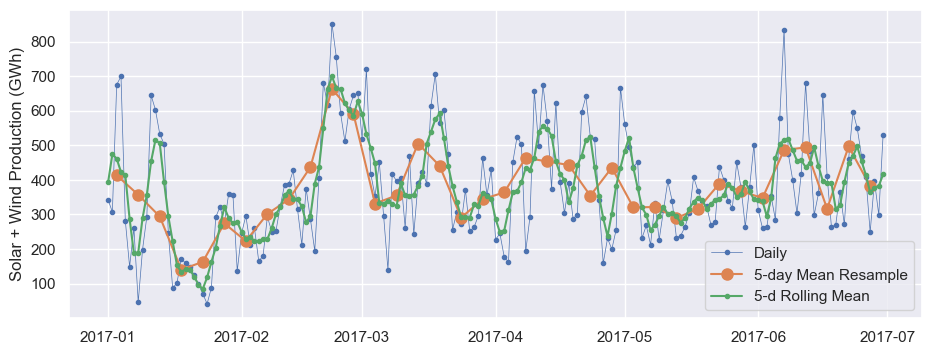

In [54]:
# compute 5-day mean
opsd_5d_mean = opsd_daily[DATA_COLUMNS].resample('5D').mean()
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Wind+Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_5d_mean.loc[start:end, 'Wind+Solar'],
marker='o', markersize=8, linestyle='-', label='5-day Mean Resample')
ax.plot(opsd_5d.loc[start:end, 'Wind+Solar'],
marker='.', linestyle='-', label='5-d Rolling Mean')
ax.set_ylabel('Solar + Wind Production (GWh)')
_ = ax.legend()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.

## Trends

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

We’ve already computed 7-day rolling means, so now let’s compute the yearly (365-day) rolling mean of our OPSD data.

In [55]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[DATA_COLUMNS].rolling(
    window=365,
    center=True,
    min_periods=360
).mean()

Let’s plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.

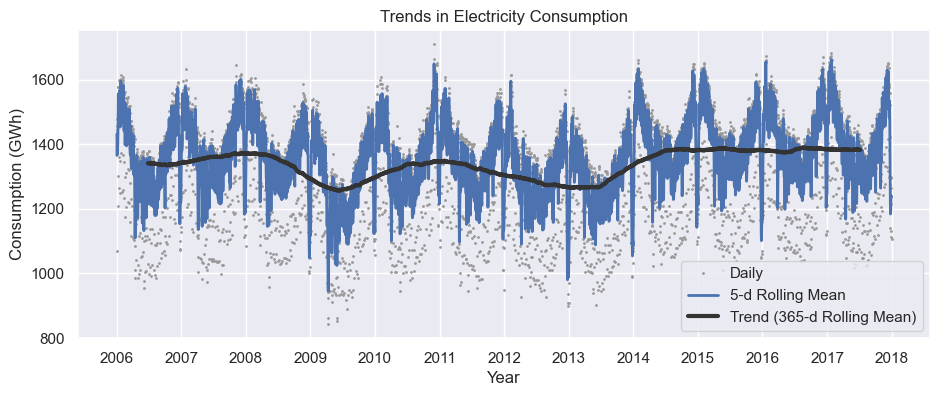

In [56]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_5d['Consumption'], linewidth=2, label='5-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the yearly rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

Now let’s look at trends in wind and solar production:

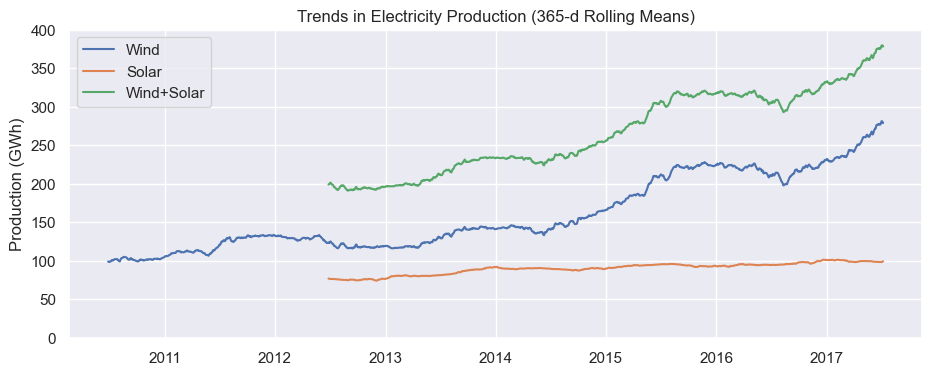

In [57]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

We can see a small increasing trend in solar power production and a more noticeable increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.

### Exercise 3: When is electricity consumption typically highest and lowest?

<Axes: xlabel='Date'>

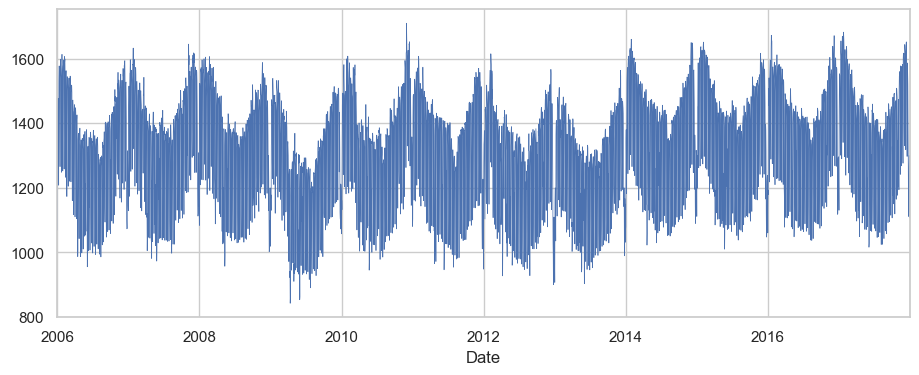

In [50]:
opsd_daily['Consumption'].plot(linewidth=0.5)

In [51]:
import matplotlib.dates as mdates

In [42]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
DATA_COLUMNS = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[DATA_COLUMNS].resample('W').mean()

<Axes: xlabel='Date'>

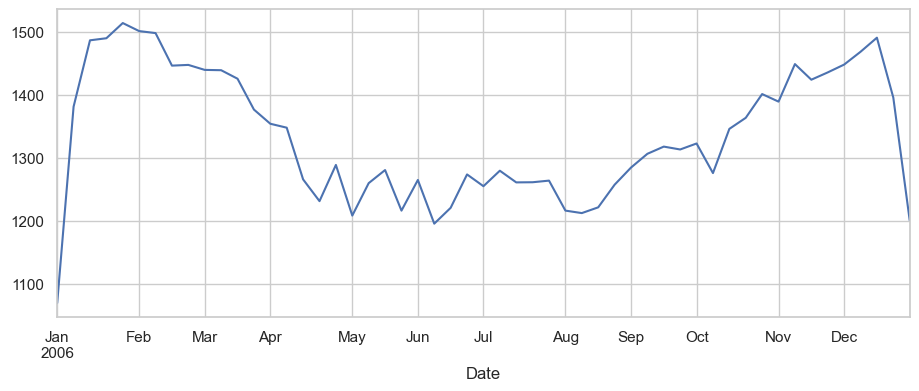

In [56]:
opsd_weekly_mean['Consumption'].loc['2006'].plot()

<Axes: xlabel='Date'>

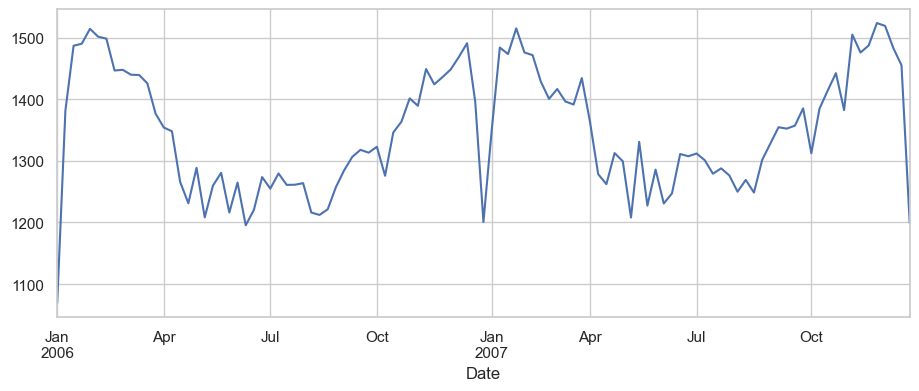

In [58]:
opsd_weekly_mean['Consumption'].loc['2006': '2007'].plot()

<Axes: xlabel='Date'>

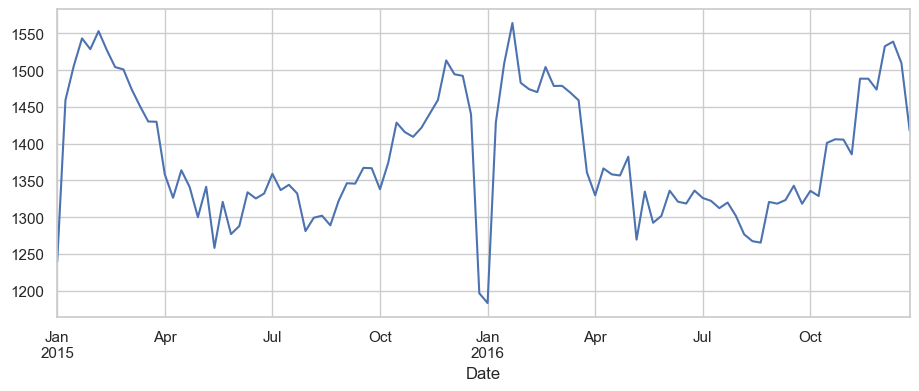

In [59]:
opsd_weekly_mean['Consumption'].loc['2015': '2016'].plot()

In [63]:
opsd_weekly_mean['Consumption'].max()

1572.8025714285711

In [43]:
opsd_365d = opsd_daily[DATA_COLUMNS].rolling(
    window=365,
    center=True,
    min_periods=360
).mean()

In [44]:
opsd_5d = opsd_daily[DATA_COLUMNS].rolling(5, center=True).mean()

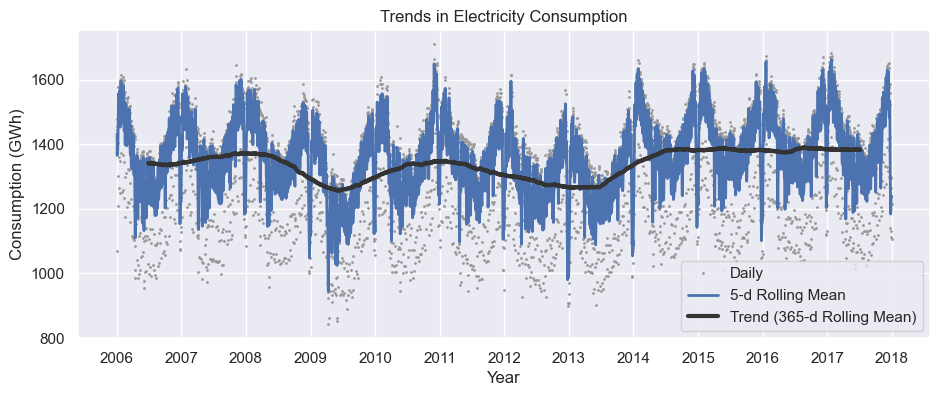

In [45]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_5d['Consumption'], linewidth=2, label='5-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

In [ ]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_5d['Consumption'], linewidth=2, label='5-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

In [49]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_93144/3767326875.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = opsd_daily.resample('H')['Consumption'].mean()
/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_93144/3767326875.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = opsd_daily.resample('M')['Consumption'].mean()


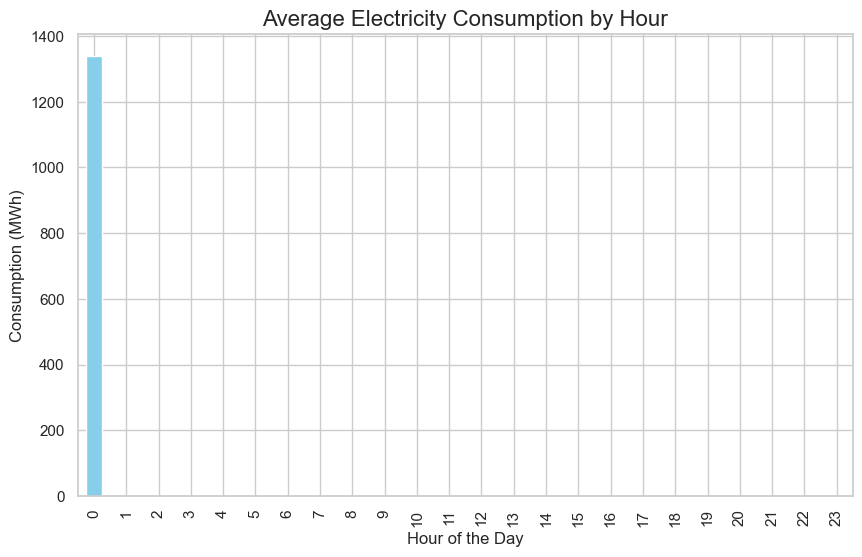

<Figure size 1000x600 with 0 Axes>

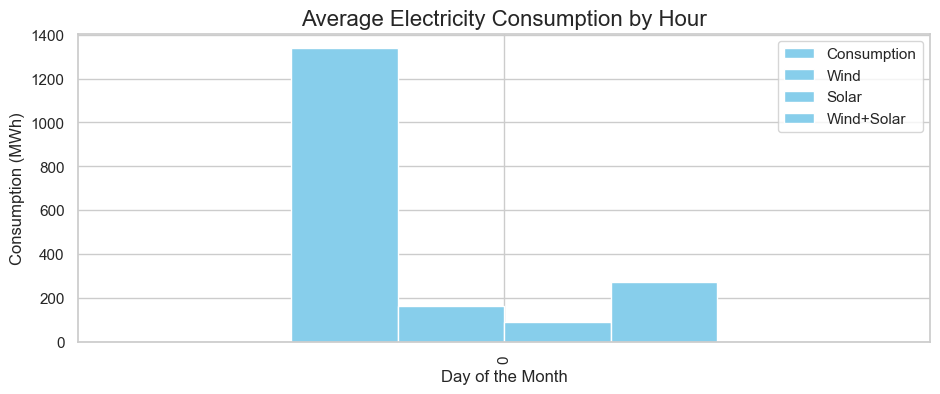

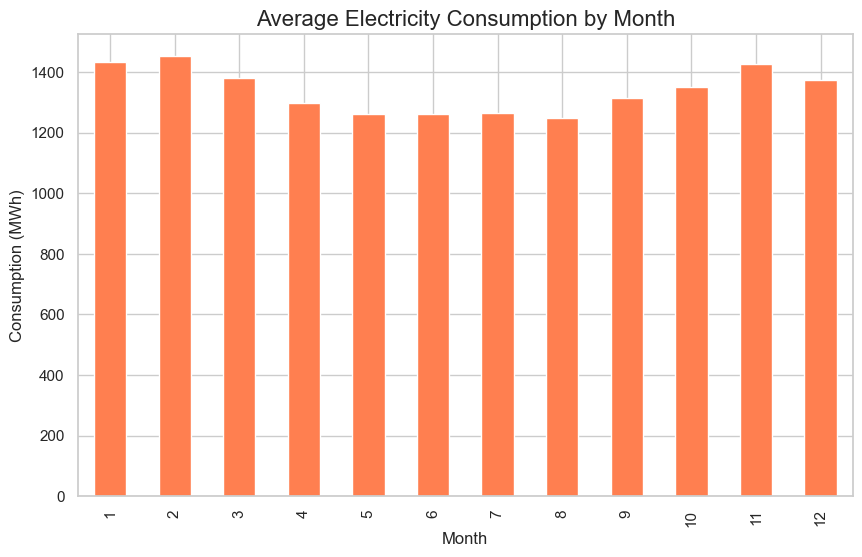

In [52]:
hourly_avg = opsd_daily.resample('H')['Consumption'].mean()
daily_avg = opsd_daily.resample('D')['Consumption'].mean()
monthly_avg = opsd_daily.resample('M')['Consumption'].mean()

# Visualization
sns.set(style="whitegrid")

# Hourly trends
plt.figure(figsize=(10, 6))
hourly_avg.groupby(hourly_avg.index.hour).mean().plot(kind='bar', color='skyblue')
plt.title('Average Electricity Consumption by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Consumption (MWh)', fontsize=12)
plt.show()

# Daily trends
plt.figure(figsize=(10, 6))
opsd_weekly_mean.groupby(opsd_weekly_mean.index.hour).mean().plot(kind='bar', color='skyblue')
plt.title('Average Electricity Consumption by Hour', fontsize=16)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Consumption (MWh)', fontsize=12)
plt.show()

# Monthly trends
plt.figure(figsize=(10, 6))
monthly_avg.groupby(monthly_avg.index.month).mean().plot(kind='bar', color='coral')
plt.title('Average Electricity Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Consumption (MWh)', fontsize=12)
plt.show()

<Axes: xlabel='Date'>

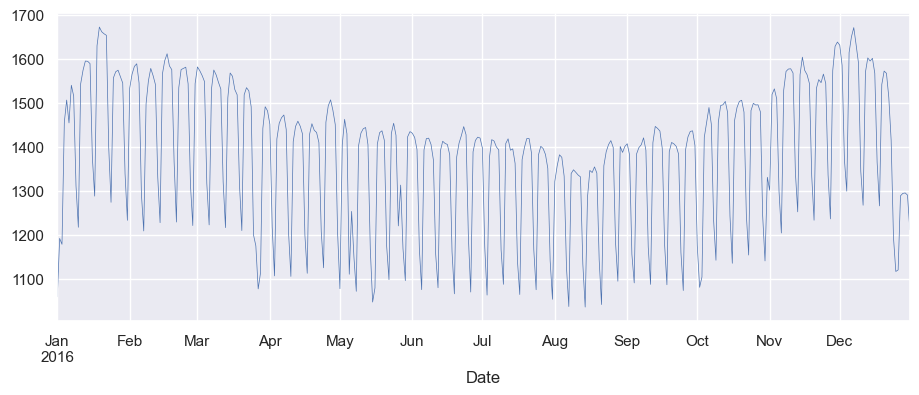

In [29]:
opsd_daily['Consumption'].loc['2016'].plot(linewidth=0.5)

<Axes: xlabel='Date'>

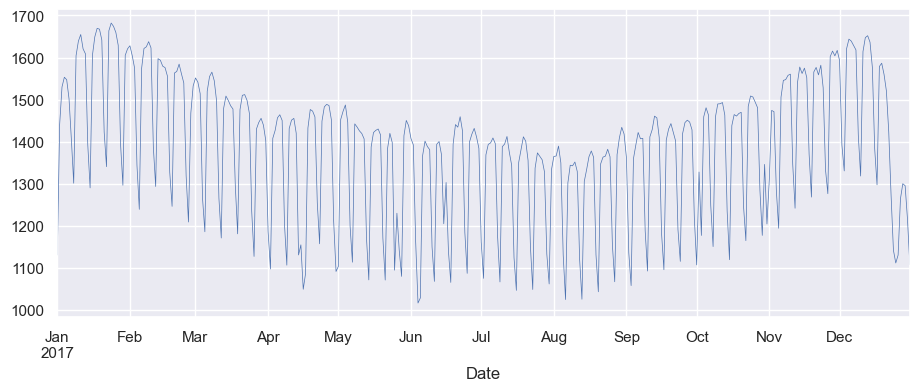

In [30]:
opsd_daily['Consumption'].loc['2017'].plot(linewidth=0.5)

<Axes: xlabel='Date'>

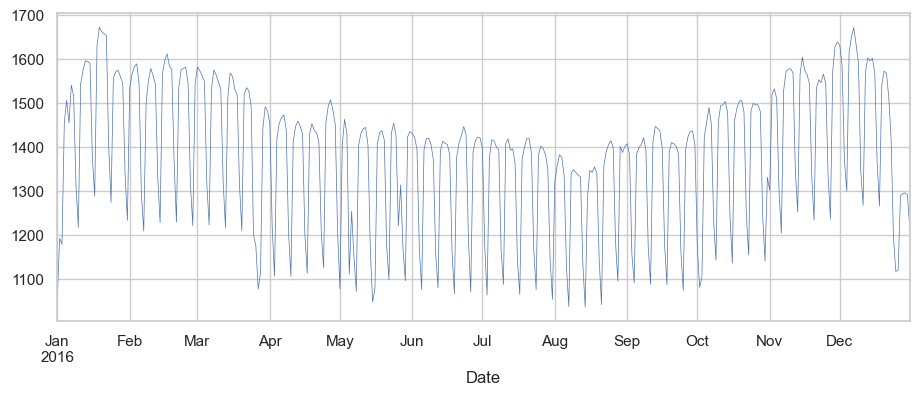

In [64]:
opsd_daily['Consumption'].loc['2016'].plot(linewidth=0.5)

<Axes: xlabel='Date'>

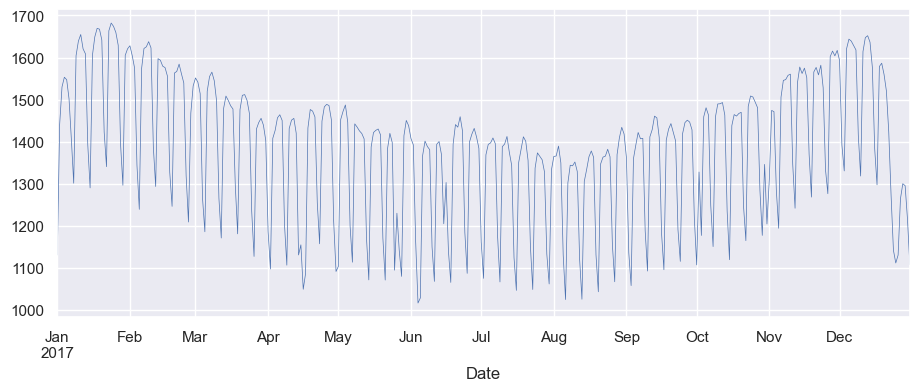

In [27]:
opsd_daily['Consumption'].loc['2017'].plot(linewidth=0.5)
plt.hline('2017-08':'2017-09')

### Exercise 4: How do wind and solar power production vary with seasons of the year?

### Exercise 5: What are the long-term trends in electricity consumption, solar power, and wind power?

### Exercise 6: How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [70]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [74]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar,Wind Ratio,Solar Ratio,Renewable Ratio
0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,0.312125,0.013078,0.325203
4379,2017-12-28,1299.86398,506.424,14.162,520.586,0.389598,0.010895,0.400493
4380,2017-12-29,1295.08753,584.277,29.854,614.131,0.451149,0.023052,0.474200
4381,2017-12-30,1215.44897,721.247,7.467,728.714,0.593400,0.006143,0.599543


In [75]:
opsd_daily["Wind Ratio"] = opsd_daily["Wind"] / opsd_daily["Consumption"]
opsd_daily["Solar Ratio"] = opsd_daily["Solar"] / opsd_daily["Consumption"]
opsd_daily["Renewable Ratio"] = opsd_daily["Wind+Solar"] / opsd_daily["Consumption"]

In [76]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar,Wind Ratio,Solar Ratio,Renewable Ratio
0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,0.312125,0.013078,0.325203
4379,2017-12-28,1299.86398,506.424,14.162,520.586,0.389598,0.010895,0.400493
4380,2017-12-29,1295.08753,584.277,29.854,614.131,0.451149,0.023052,0.474200
4381,2017-12-30,1215.44897,721.247,7.467,728.714,0.593400,0.006143,0.599543


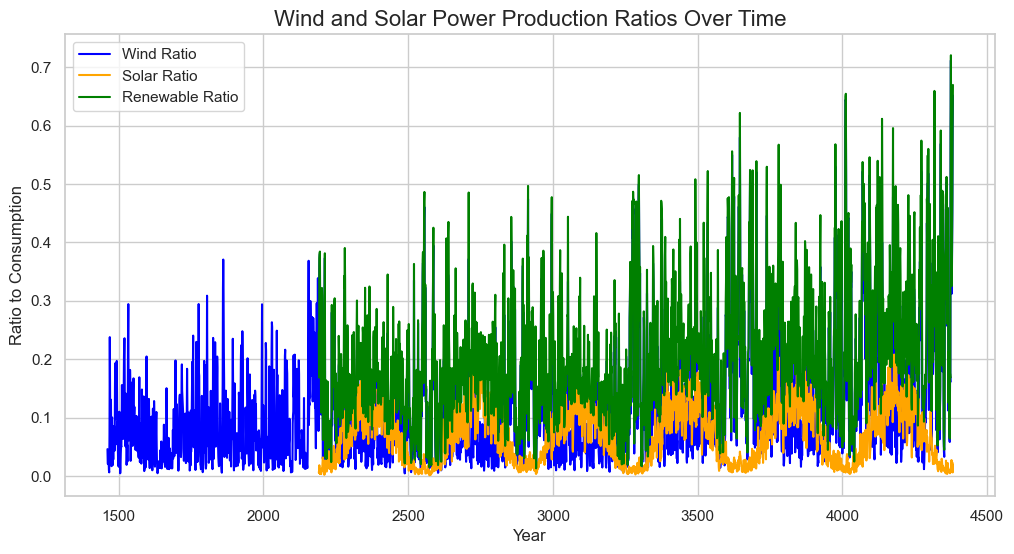

In [77]:
# Plot ratios over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=opsd_daily, x=opsd_daily.index, y="Wind Ratio", label="Wind Ratio", color="blue")
sns.lineplot(data=opsd_daily, x=opsd_daily.index, y="Solar Ratio", label="Solar Ratio", color="orange")
sns.lineplot(data=opsd_daily, x=opsd_daily.index, y="Renewable Ratio", label="Renewable Ratio", color="green")
plt.title("Wind and Solar Power Production Ratios Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ratio to Consumption", fontsize=12)
plt.legend()
plt.show()

In [13]:
hourly_avg = opsd_daily.loc['2008':'2009'].resample('H')['Consumption'].mean()
daily_avg = opsd_daily.loc['2008':'2009'].resample('D')['Consumption'].mean()
monthly_avg = opsd_daily.loc['2008':'2009'].resample('M')['Consumption'].mean()

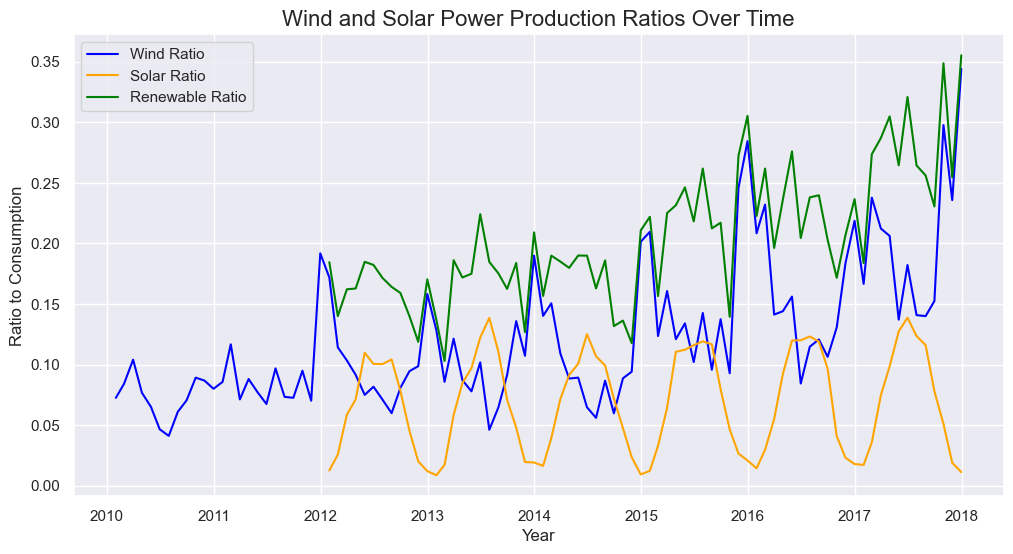

<Figure size 1200x600 with 0 Axes>

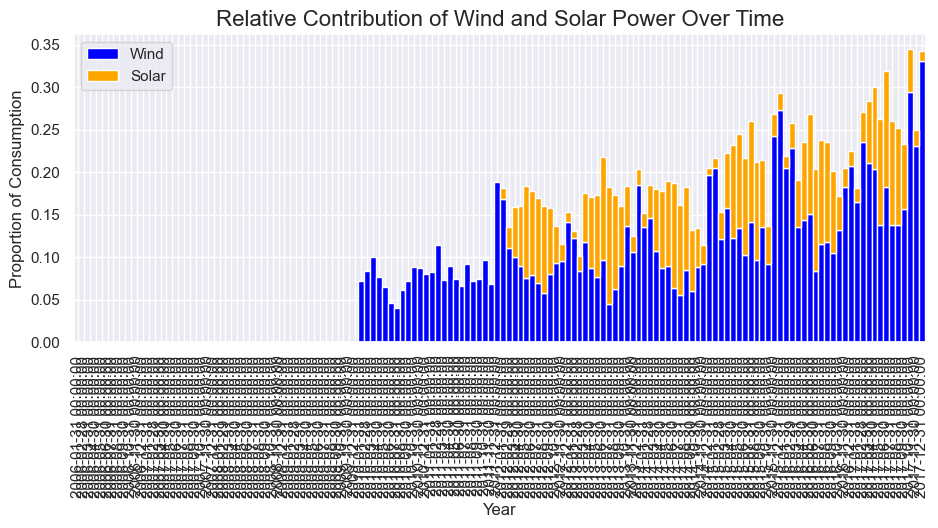

In [19]:
opsd_daily["Wind Ratio"] = opsd_daily["Wind"] / opsd_daily["Consumption"]
opsd_daily["Solar Ratio"] = opsd_daily["Solar"] / opsd_daily["Consumption"]
opsd_daily["Renewable Ratio"] = opsd_daily["Wind+Solar"] / opsd_daily["Consumption"]

# Resample to monthly data for trend analysis
monthly_data = opsd_daily.resample("M").mean()

# Plot ratios over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y="Wind Ratio", label="Wind Ratio", color="blue")
sns.lineplot(data=monthly_data, x=monthly_data.index, y="Solar Ratio", label="Solar Ratio", color="orange")
sns.lineplot(data=monthly_data, x=monthly_data.index, y="Renewable Ratio", label="Renewable Ratio", color="green")
plt.title("Wind and Solar Power Production Ratios Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Ratio to Consumption", fontsize=12)
plt.legend()
plt.show()

# Optional: Stacked Bar Chart for Relative Contributions
plt.figure(figsize=(12, 6))
monthly_data[["Wind", "Solar"]].div(monthly_data["Consumption"], axis=0).plot(kind='bar', stacked=True, color=["blue", "orange"], width=1)
plt.title("Relative Contribution of Wind and Solar Power Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of Consumption", fontsize=12)
plt.show()

## Conclusions


We’ve learned how to wrangle, analyze, and visualize our time series data in pandas using techniques such as time-based indexing, resampling, and rolling windows. Applying these techniques to our OPSD data set, we’ve gained insights on seasonality, trends, and other interesting features of electricity consumption and production in Germany.